In [25]:
import pandas as pd


df = pd.read_csv('owid-covid-data.csv')
print("columns",df.columns)
print(df.head())
print(df.isnull().sum())

columns Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
 

In [27]:
import pandas as pd

df = pd.read_csv('owid-covid-data.csv')

# Filter countries of interest.
countries_of_interest = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries_of_interest)]

# Drop rows with missing dates/critical values.
critical_cols = ['date', 'location', 'iso_code' ]
df = df.dropna(subset=critical_cols)

# Convert date column to datetime.
df['date'] = pd.to_datetime(df['date'])

# Handling missing numeric values.
numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
df[numeric_cols] = df[numeric_cols].interpolate(method='linear')

print(df.describe())

print(df.info())


                                date   total_cases     new_cases  \
count                           5030  5.030000e+03  5.030000e+03   
mean   2022-04-21 20:06:06.441351936  3.152504e+07  2.958726e+04   
min              2020-01-05 00:00:00  0.000000e+00  0.000000e+00   
25%              2021-02-27 00:00:00  3.383320e+05  0.000000e+00   
50%              2022-04-22 00:00:00  1.753032e+07  0.000000e+00   
75%              2023-06-15 00:00:00  4.500218e+07  0.000000e+00   
max              2024-08-12 00:00:00  1.034368e+08  5.650933e+06   
std                              NaN  3.606617e+07  2.062604e+05   

       new_cases_smoothed  total_deaths    new_deaths  new_deaths_smoothed  \
count         4565.000000  5.030000e+03   5030.000000          5007.000000   
mean         32600.748017  3.872447e+05    344.428827           345.905018   
min              0.000000  0.000000e+00      0.000000             0.000000   
25%             41.143000  5.678000e+03      0.000000             0.429000 

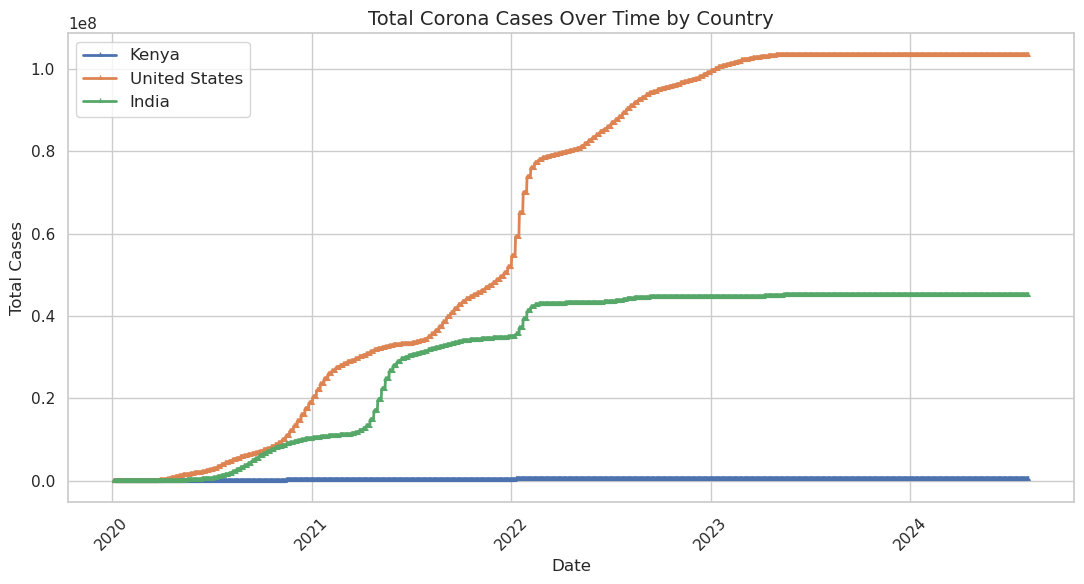

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

df = pd.read_csv('owid-covid-data.csv')

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (11, 6)

df['date'] = pd.to_datetime(df['date'])


plt.figure(figsize=(11, 6))
for country in ['Kenya', 'United States', 'India']:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], 
             label=country, linewidth=2, marker='2', markersize=4)

plt.title('Total Corona Cases Over Time by Country', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


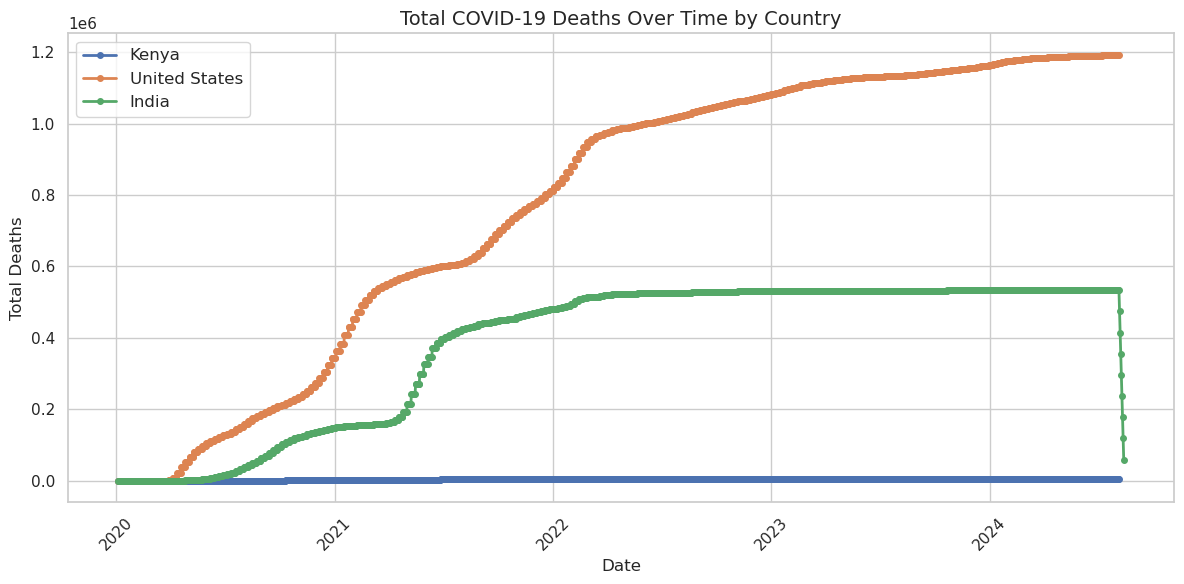

In [28]:
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], 
             label=country, linewidth=2, marker='o', markersize=4)

plt.title('Total COVID-19 Deaths Over Time by Country', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


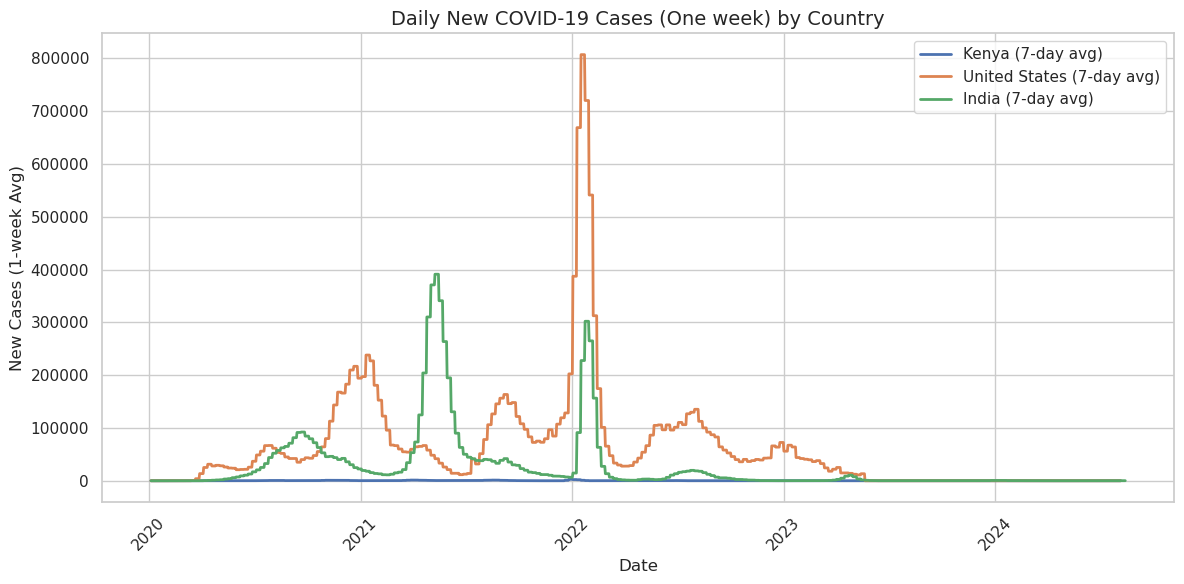

In [29]:
#  Calculate a weekly average of new cases for each country
df['new_cases_week_avg'] = df.groupby('location')['new_cases'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Plot 7-day average of new cases
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases_week_avg'], 
             label=f"{country} (7-day avg)", linewidth=2)

plt.title('Daily New COVID-19 Cases (One week) by Country', fontsize=14)
plt.ylabel('New Cases (1-week Avg)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


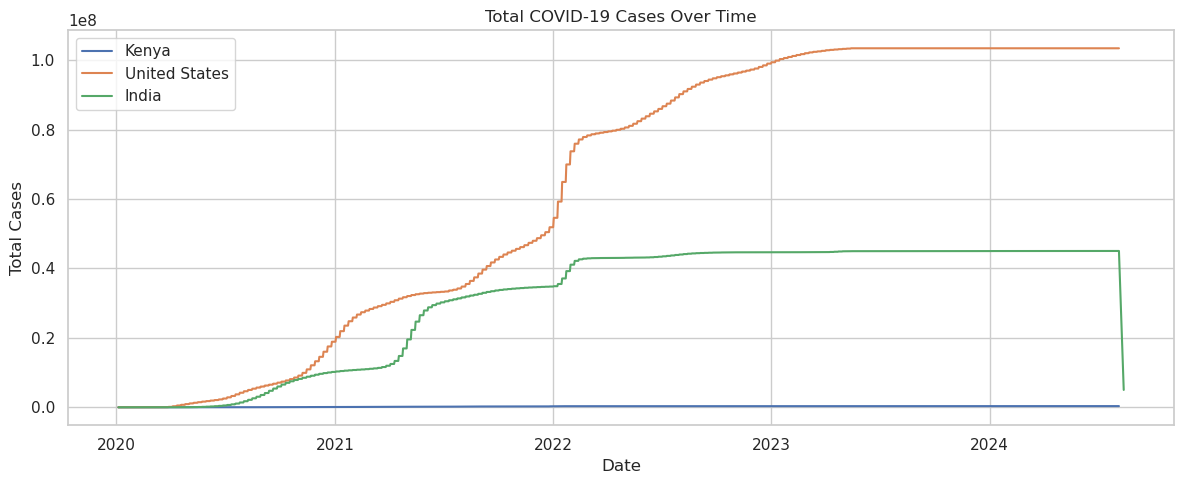

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(12, 5))
for country in ['Kenya', 'United States', 'India']:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()


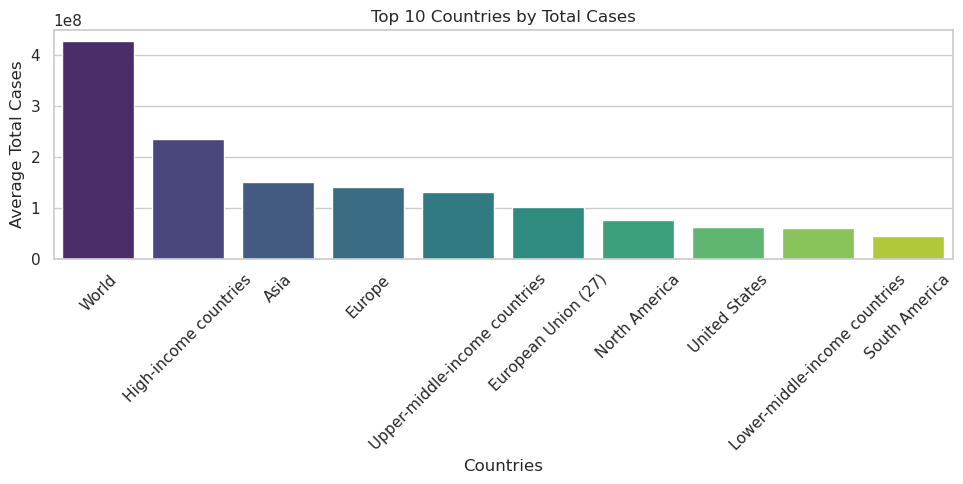

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('owid-covid-data.csv')

top_countries = df.groupby('location')['total_cases'].mean().sort_values(ascending=False).head(10)
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['location', 'total_cases']

# Create bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_countries_df, x='location', y='total_cases', hue='location', palette='viridis', dodge=False, legend=False)

plt.title('Top 10 Countries by Total Cases')
plt.xlabel('Countries')
plt.ylabel('Average Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



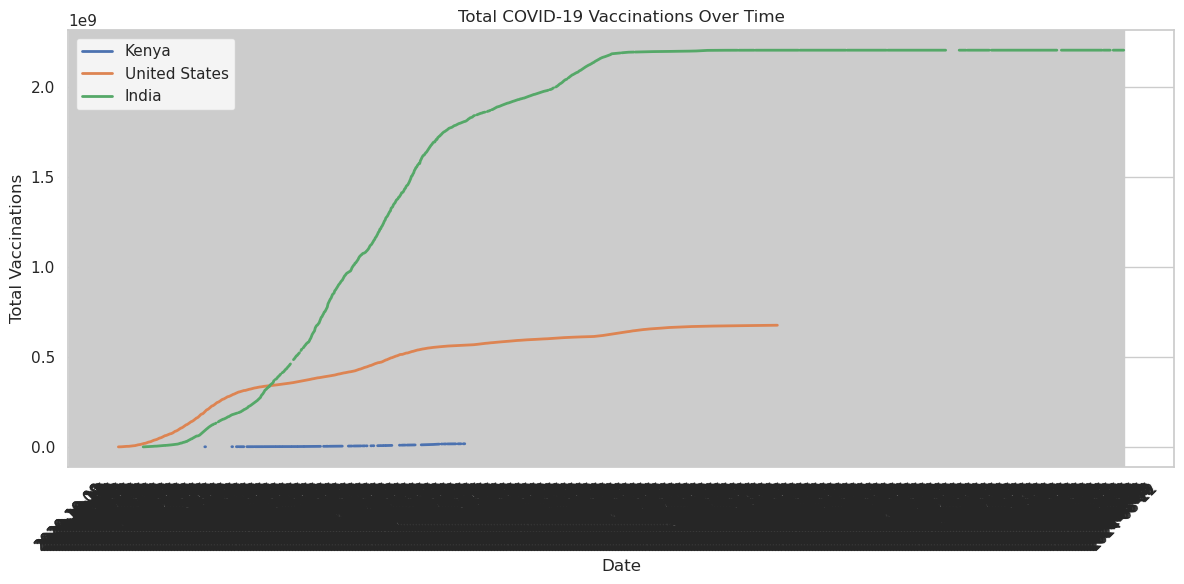

In [32]:
# cumulative vaccination overtime - line chart
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid') 


plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    country_data = df[df['location'] == country]
    plt.plot(
        country_data['date'],
        country_data['total_vaccinations'],
        label=country, linewidth=2)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


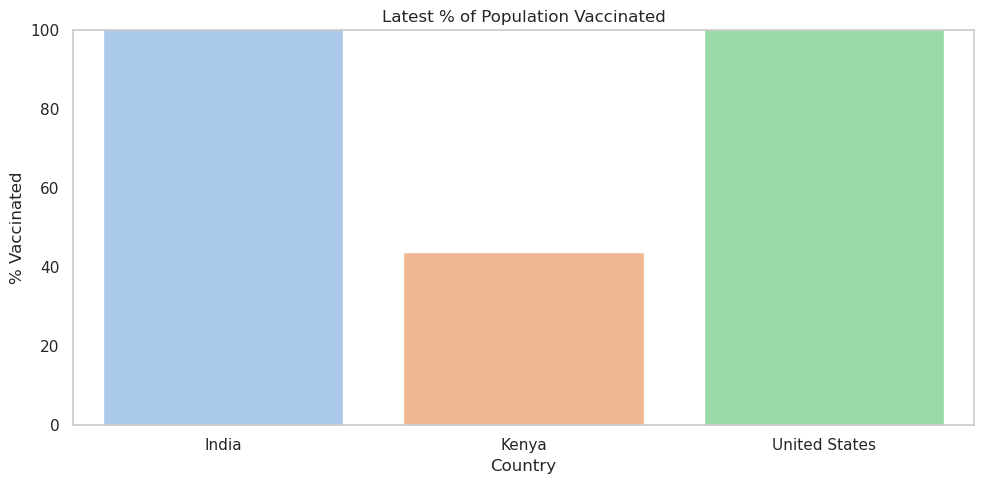

In [34]:
# Get the latest vaccination data for each country
latest_vacc = df.sort_values('date').groupby('location').last().reset_index()
latest_vacc = latest_vacc[latest_vacc['location'].isin(['Kenya', 'United States', 'India'])]

latest_vacc = latest_vacc.sort_values('location')

plt.figure(figsize=(10, 5))
sns.barplot(
    data=latest_vacc,
    x='location',
    y='total_vaccinations_per_hundred',
    hue='location',
    palette='pastel',
    dodge=False,
    legend=False
)

plt.title('Latest % of Population Vaccinated')
plt.ylabel('% Vaccinated')
plt.xlabel('Country')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



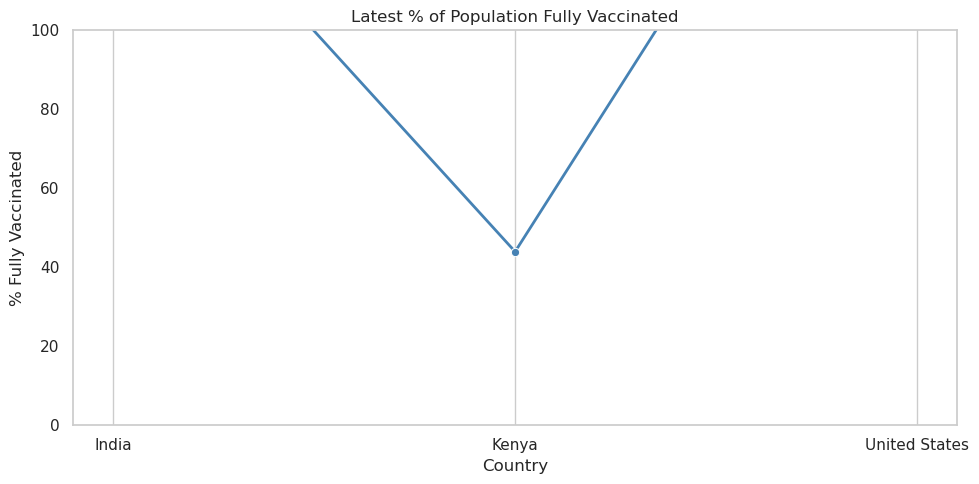

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent style
sns.set(style='whitegrid')

# Sort to maintain logical order on x-axis
latest_vacc = latest_vacc.sort_values('location')

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=latest_vacc,
    x='location',
    y='total_vaccinations_per_hundred',
    marker='o',
    linewidth=2,
    color='steelblue'
)

# Titles and labels
plt.title('Latest % of Population Fully Vaccinated')
plt.ylabel('% Fully Vaccinated')
plt.xlabel('Country')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


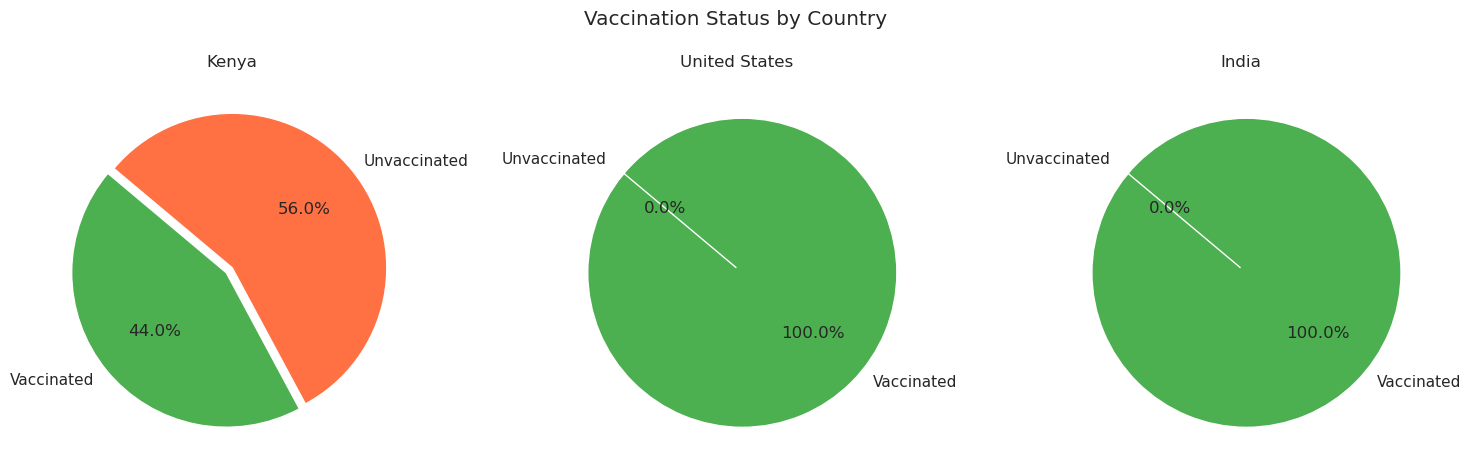

In [36]:
# Create pie charts with proper handling of missing values
countries = ['Kenya', 'United States', 'India']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, country in enumerate(countries):
    country_data = latest_vacc[latest_vacc['location'] == country]
    vaccinated = country_data['total_vaccinations_per_hundred'].values[0] if len(country_data) > 0 else 0
    # Ensure we don't exceed 100%
    vaccinated = min(vaccinated, 100) if not pd.isna(vaccinated) else 0
    unvaccinated = 100 - vaccinated

    axs[i].pie(
        [vaccinated, unvaccinated],
        labels=['Vaccinated', 'Unvaccinated'],
        colors=['#4CAF50', '#FF7043'],
        autopct='%1.1f%%',
        startangle=140,
        explode=(0.05, 0)
    )
    axs[i].set_title(f'{country}')

plt.suptitle('Vaccination Status by Country')
plt.tight_layout()
plt.show()


### 🥇 key findings

✔ **United States had the highest covid-19 cases and Death cases overtime followed by India then Kenya.**

✔ **Highest vaccination was dominated by United States, India and Kenya respectively.**

✔ **United States had the fastest and most widespread vaccination rollout.**
  By the latest available data, over 65% of the U.S. population was fully vaccinated, significantly higher than Kenya (~25%).

✔ **India showed a sharp rise in new cases during mid-2021, likely correlating with the Delta variant surge.**
  The curve flattens later, suggesting effective containment and vaccination efforts.

✔ **Kenya’s vaccination progress remained slow, with periodic plateaus in total vaccinations, indicating supply or logistical constraints.**


### ⚠️ Anomalies & Patterns

✔ **Missing values in vaccination data in some countries.**
✔ **Vaccination correlated with reduced case trends over time.**
✔ **Sudden data drops** indicate possible reporting issues.

